In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np
import Task     #import values from previous file
import importlib

importlib.reload(Task)

<h1>Outflow plot</h1>

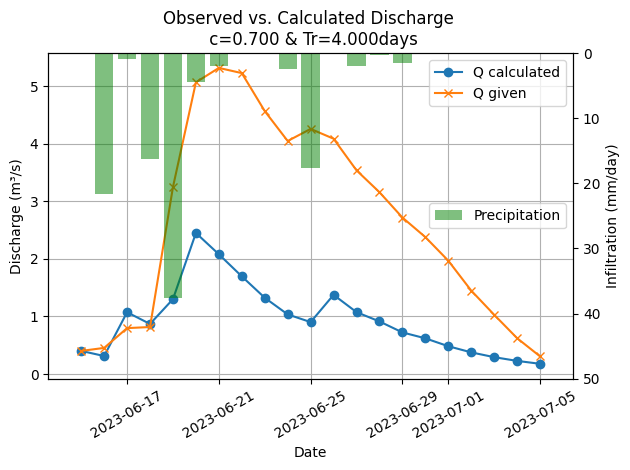

In [5]:
fig,ax1=plt.subplots()

ax1.plot(Task.df['Date'],Task.df['Q calculated'],label='Q calculated',marker='o')
ax1.plot(Task.df['Date'],Task.df['Q given'],label='Q given',marker='x')
ax1.set_xlabel('Date')
plt.xticks(rotation=30)
ax1.set_ylabel('Discharge (m³/s)')
ax1.set_title('Observed vs. Calculated Discharge \n c={:.3f} & Tr={:.3f}days'.format(Task.c,Task.Tr))
ax1.grid(True)



ax2 = ax1.twinx()
ax2.bar(Task.df['Date'], Task.df['Infiltration'], color='green', alpha=0.5, label='Precipitation')
ax2.set_ylabel('Infiltration (mm/day)')
ax2.set_ylim(top=50)
ax2.invert_yaxis()
ax2.legend(loc=7)
ax1.legend(loc=1)
fig.tight_layout()

In [6]:
rms = np.sqrt(mean_squared_error(Task.df['Q given'], Task.df['Q calculated']))

def NSE(a1,a2):
    denominator = np.sum((a1 - np.mean(a1)) ** 2)
    numerator = np.sum((a2 - a1) ** 2)
    nse_val = 1 - numerator / denominator
    return nse_val

nse=NSE(Task.df['Q given'],Task.df['Q calculated'])

print('The RMSE and NSE are', rms,'&',nse)

The RMSE and NSE are 2.118359778362858 & -0.5142396077850553
